# Lab 06 
## Part 1: Midterm 1 Q3 Q4



In [25]:
library(tidyverse)
library(nycflights13)

## Problem 3, Oil Pipeline Dataset

In this problem you will be working with data about oil pipeline accidents. The oil pipeline accident reports were collected and published by the Department of Transportation's Pipeline and Hazardous Materials Safety Administration.

Run the following code to load the data set.

In [2]:
pipeline_data <- read_csv("https://raw.githubusercontent.com/bmanzo/misc/master/pipelines.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  accident_date = col_datetime(format = ""),
  operator_name = col_character(),
  pipeline_location = col_character(),
  pipeline_type = col_character(),
  liquid_type = col_character(),
  accident_city = col_character(),
  accident_county = col_character(),
  accident_state = col_character(),
  cause_category = col_character(),
  liquid_ignition = col_character(),
  liquid_explosion = col_character(),
  pipeline_shutdown = col_character()
)

See spec(...) for full column specifications.



In [3]:
print(pipeline_data)

# A tibble: 2,794 x 32
   report_number accident_year accident_date       operator_id operator_name
           <dbl>         <dbl> <dttm>                    <dbl> <chr>        
 1      20100016          2010 2010-01-01 07:15:00       32109 ONEOK NGL PI…
 2      20100254          2010 2010-01-04 08:30:00       15786 PORTLAND PIP…
 3      20100038          2010 2010-01-05 10:30:00       20160 PETROLOGISTI…
 4      20100260          2010 2010-01-06 19:30:00       11169 ENBRIDGE ENE…
 5      20100030          2010 2010-01-07 13:00:00         300 PLAINS PIPEL…
 6      20100021          2010 2010-01-08 23:38:00       11169 ENBRIDGE ENE…
 7      20110036          2010 2010-01-09 00:15:00       26041 KINDER MORGA…
 8      20100255          2010 2010-01-09 01:12:00       12624 MOBIL CORP   
 9      20100261          2010 2010-01-10 19:46:00       26041 KINDER MORGA…
10      20100024          2010 2010-01-11 14:30:00       31684 CONOCOPHILLI…
# … with 2,784 more rows, and 27 more variables: pipe

### Part (a) (3 points)

Create a new table, `mi_pipes`, containing all accidents which took place in Michigan ("MI") `accident_state`, sorted by `accident_year`. Print the first 6 lines of `mi_pipes` using the `head()` function.

In [4]:
mi_pipes = pipeline_data %>% filter(accident_state=='MI') %>% arrange(accident_year)
mi_pipes %>% head(6)

report_number,accident_year,accident_date,operator_id,operator_name,pipeline_location,pipeline_type,liquid_type,accident_city,accident_county,⋯,all_injuries,all_fatalities,property_damage_costs,lost_commodity_costs,public_private_property_damage_costs,emergency_response_costs,environmental_remediation_costs,other_costs,all_costs,close_time
<dbl>,<dbl>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20100078,2010,2010-04-25 09:00:00,32147,MARATHON PIPE LINE LLC,ONSHORE,ABOVEGROUND,CRUDE OIL,SAMARIA,MONROE,⋯,0,0,0,7018,0,171265,925684,0,1103967,723
20100130,2010,2010-05-29 12:34:00,395,AMOCO OIL CO,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",CONSTANTINE,ST. JOSEPH,⋯,0,0,275000,267246,45000,278000,1100000,0,1965246,5858
20100223,2010,2010-09-11 08:55:00,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,FOWLERVILLE,LIVINGSTON,⋯,0,0,20000,0,0,2500,2500,0,25000,0
20100239,2010,2010-10-06 13:20:00,18718,SUNOCO PIPELINE L.P.,ONSHORE,UNDERGROUND,CRUDE OIL,ST. CLAIR,ST. CLAIR,⋯,0,0,0,0,0,70000,5000,0,75000,0
20100307,2010,2010-12-01 09:00:00,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,ABOVEGROUND,CRUDE OIL,NORTH BRANCH,LAPEER,⋯,0,0,50,0,0,0,10000,0,10050,0
20110011,2010,2010-12-11 15:30:00,1845,"BUCKEYE PARTNERS, LP",ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",TAYLOR,WAYNE,⋯,0,0,0,0,0,1096,6255,2163,9514,0


### Part (b) (3 points)

Create a boxplot of the logarithm of the `all_costs` variable, grouped by `pipeline_type`. That is, your plot should have five boxplots for each of the pipeline_type respectively. 

Warning message:
“Removed 34 rows containing non-finite values (stat_boxplot).”


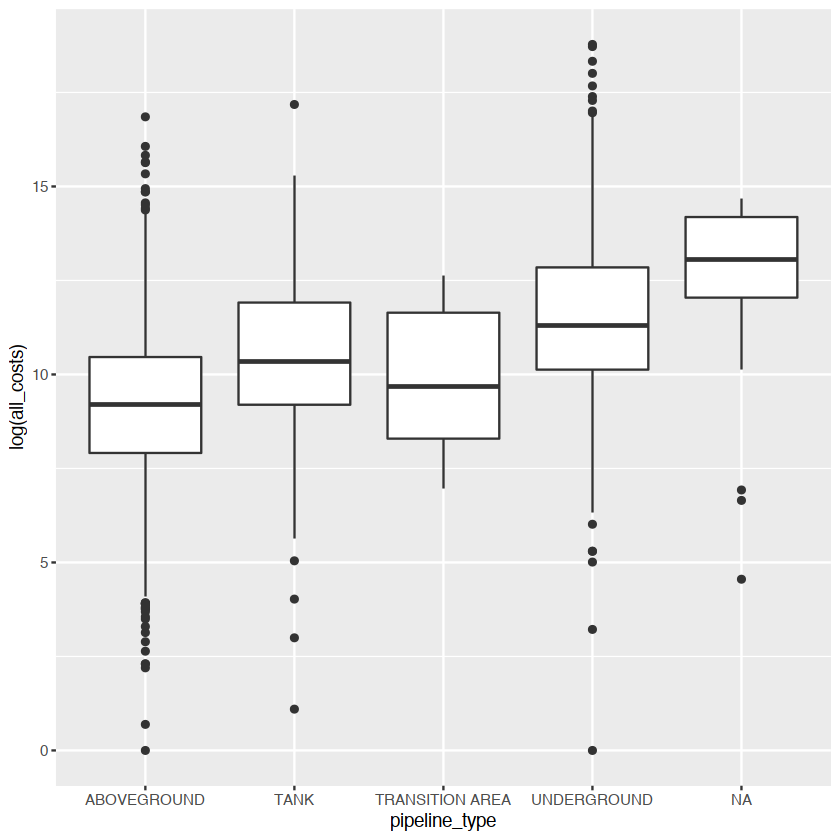

In [5]:
ggplot(pipeline_data) + geom_boxplot(aes(x=pipeline_type, y=log(all_costs)))

### Part (c) (2 points)

What benefit does using the log transform have (you can try plotting the non-log transformed data if you are unsure)? Which pipeline type has the highest median cost of an accident?

**Answer**: The log transform reduces the effect of large values, allowing us to determine a pattern in the cost relative to pipeline type. Underground pipelines have the highest accident cost (NA would be an accetable answer as well).

### Part (d) (3 points)

Construct a new table called `costs` containing only the columns from `pipeline_data` which contain information about the accident cost (these all end with "costs"). Filter out any rows in which there is at least one missing value. 

Hint: The `complete.cases()` function may be useful here. You may also find the function `ends_with` useful.

In [6]:
costs = pipeline_data %>% select(ends_with("costs")) 
costs = costs %>% filter(complete.cases(costs))
print(costs)

# A tibble: 2,777 x 7
   property_damage… lost_commodity_… public_private_… emergency_respo…
              <dbl>            <dbl>            <dbl>            <dbl>
 1              110             1517                0                0
 2             4000                8                0                0
 3                0              200                0                0
 4              200               40                0            11300
 5            20000              150                0             7500
 6            76940           167775           150000          1800000
 7                0              400                0                0
 8              400               13                0                0
 9                0              336                0                0
10                0               50                0            10000
# … with 2,767 more rows, and 3 more variables:
#   environmental_remediation_costs <dbl>, other_costs <dbl>, all_costs <dbl>


### Part (e) (3 points)
Create a new data set named some_costs.  Your new data set should select all variables except for `all_costs`. Then, calculate the mean of each variable, you should obtain a table with 1 row and 6 columns. 

Using this newly created table, construct a pie chart of the mean cost from each category.  

Hint: to summarize all variables, you can use the function `summarise_all`.  To create a pie chart, you need to use the `gather` function to change the table that you have created to a table with 6 rows and 2 columns. 

# A tibble: 6 x 2
  key                                    value
  <chr>                                  <dbl>
1 property_damage_costs                111491.
2 lost_commodity_costs                   9732.
3 public_private_property_damage_costs  16908.
4 emergency_response_costs             229393.
5 environmental_remediation_costs      135411.
6 other_costs                           33517.


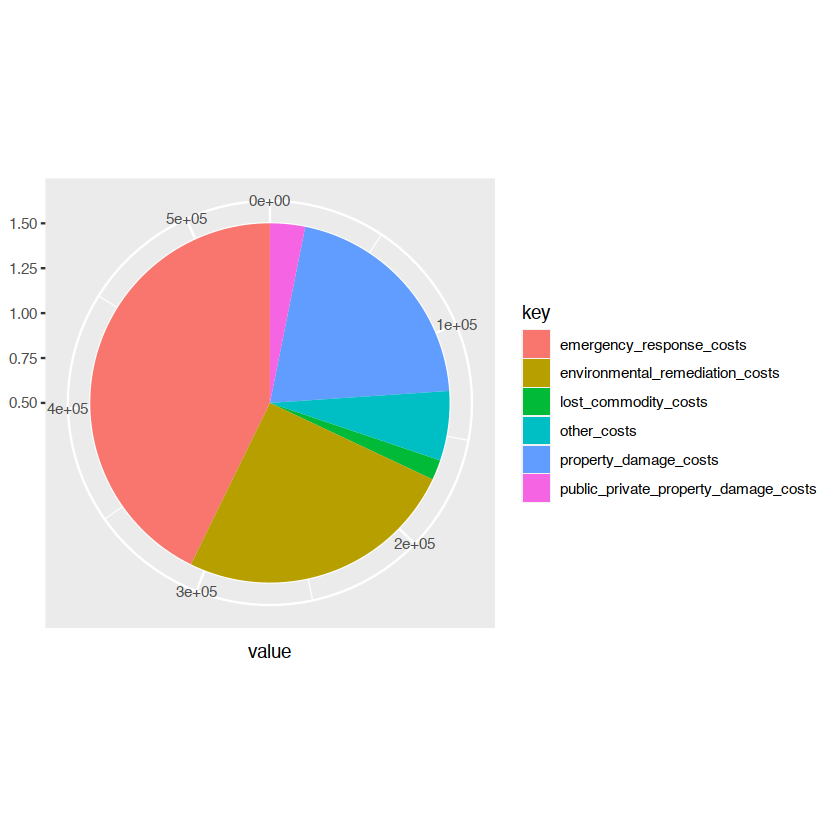

In [7]:
some_costs = costs %>% select(-all_costs) %>% summarise_all(mean) %>% gather() %>% print
ggplot(data = some_costs) +
  geom_col(mapping = aes(x = 1, fill=key, y=value), width = 1) +
  labs(x = NULL) +
  coord_polar(theta="y")

### Part (f) (2 points)
Returning to the `pipeline_data` table, add a new variable, `env_prop`, which is defined as the `environmental_remediation_costs` divide by `all_costs`. Store the new table in a new object called `pipeline_env`. 

In [8]:
pipeline_env <- pipeline_data %>% 
mutate(env_prop = environmental_remediation_costs / all_costs) 
print(pipeline_env)

# A tibble: 2,794 x 33
   report_number accident_year accident_date       operator_id operator_name
           <dbl>         <dbl> <dttm>                    <dbl> <chr>        
 1      20100016          2010 2010-01-01 07:15:00       32109 ONEOK NGL PI…
 2      20100254          2010 2010-01-04 08:30:00       15786 PORTLAND PIP…
 3      20100038          2010 2010-01-05 10:30:00       20160 PETROLOGISTI…
 4      20100260          2010 2010-01-06 19:30:00       11169 ENBRIDGE ENE…
 5      20100030          2010 2010-01-07 13:00:00         300 PLAINS PIPEL…
 6      20100021          2010 2010-01-08 23:38:00       11169 ENBRIDGE ENE…
 7      20110036          2010 2010-01-09 00:15:00       26041 KINDER MORGA…
 8      20100255          2010 2010-01-09 01:12:00       12624 MOBIL CORP   
 9      20100261          2010 2010-01-10 19:46:00       26041 KINDER MORGA…
10      20100024          2010 2010-01-11 14:30:00       31684 CONOCOPHILLI…
# … with 2,784 more rows, and 28 more variables: pipe

### Part (g) (4 points)
Using `pipeline_env` that you have just created, construct a summary table that contains the average environmental remediation cost for each liquid type `liquid_type`, as well as the total number of accidents per liquid type. Sort this table by mean environmental remediation cost proportion `env_prop`. Store it in a variable called `env_summary` and print the table.

In [9]:
env_summary = pipeline_env %>% 
group_by(liquid_type) %>% 
summarise(mean_env = mean(env_prop, na.rm=T), n()) %>%
arrange(mean_env)
print(env_summary)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 5 x 3
  liquid_type                                          mean_env `n()`
  <chr>                                                   <dbl> <int>
1 CO2 (CARBON DIOXIDE)                                  0.00106    38
2 HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS            0.0622    418
3 CRUDE OIL                                             0.281    1397
4 REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID    0.299     939
5 BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)  0.3         2


### Part (h) (5 points)
Create a table which contains the pipeline operator (`operator_name`) with the most accidents for each `pipeline_type`, as well as the total number of injured persons (found in `all_injuries`) associated with all accidents from that operator. Store your answer in a table called `most_dangerous`. Your table should have 4 columns: `pipeline_type`, `operator_name`, `counts` (number of accidents), and `hurt` (number of injuries). Print the table using `print()`.  

In [10]:
pipeline_data %>%
  filter(!is.na(pipeline_type)) %>%
  group_by(pipeline_type, operator_name) %>%
  summarise(counts= n(), hurt = sum(all_injuries)) %>%
  slice_max(order_by=counts) %>% 
  slice_max(order_by=hurt)

`summarise()` regrouping output by 'pipeline_type' (override with `.groups` argument)



pipeline_type,operator_name,counts,hurt
<chr>,<chr>,<int>,<dbl>
ABOVEGROUND,ENTERPRISE CRUDE PIPELINE LLC,111,2
TANK,"KINDER MORGAN LIQUID TERMINALS, LLC",32,0
TRANSITION AREA,COLONIAL PIPELINE CO,6,0
UNDERGROUND,SUNOCO PIPELINE L.P.,84,0


## Problem 4, Movie Dataset


For this question, you are given a dataset of the movies and TV shows that received the most number of votes on IMDB.com. Each row is a different title whose type is given by "titleType".

To load the data set, implement the following code:

In [11]:
imdb_titles <- read_csv("https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab4/imdb_titles.csv.gz")

Parsed with column specification:
cols(
  primaryTitle = col_character(),
  titleType = col_character(),
  startYear = col_double(),
  endYear = col_double(),
  runtimeMinutes = col_double(),
  genres = col_character(),
  averageRating = col_double(),
  numVotes = col_double()
)



In [12]:
print(imdb_titles)

# A tibble: 8,007 x 8
   primaryTitle titleType startYear endYear runtimeMinutes genres averageRating
   <chr>        <chr>         <dbl>   <dbl>          <dbl> <chr>          <dbl>
 1 The Shawsha… movie          1994      NA            142 Drama            9.3
 2 The Dark Kn… movie          2008      NA            152 Actio…           9  
 3 Inception    movie          2010      NA            148 Actio…           8.8
 4 Fight Club   movie          1999      NA            139 Drama            8.8
 5 Pulp Fiction movie          1994      NA            154 Crime…           8.9
 6 Forrest Gump movie          1994      NA            142 Drama…           8.8
 7 Game of Thr… tvSeries       2011    2019             57 Actio…           9.3
 8 The Matrix   movie          1999      NA            136 Actio…           8.7
 9 The Lord of… movie          2001      NA            178 Actio…           8.8
10 The Lord of… movie          2003      NA            201 Actio…           8.9
# … with 7,997 mor

### Part (a) (5 points)

Construct a data frame where each row corresponds to a titleType (there are 3 different title types), with the following columns:
-  ```titleType```: the name of the titleType
-  ```ntitles``` containing the number of titles with that "titleType"
-   ```averageRating``` containing the mean averageRating of that "titleType"
-   ```numVotes``` containing the mean numVotes of that "titleType". 

Arrange this data frame by ```numVotes``` in descending order. There should be three rows. Store this in the object ```titletypes``` and print the result.



In [13]:
titletypes <- imdb_titles %>%
    group_by(titleType) %>%
    summarize(ntitles=n(), averageRating=mean(averageRating), numVotes=mean(numVotes)) %>%
    arrange(desc(numVotes))

print(titletypes)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 3 x 4
  titleType ntitles averageRating numVotes
  <chr>       <int>         <dbl>    <dbl>
1 movie        6889          6.61   93447.
2 tvSeries      880          7.76   60577.
3 tvEpisode     238          8.84   23646.


### Part (b) (3 points) 
We want to investigate the relationship between the number of votes a title receives and its average rating. Using "imdb_titles", plot a scatterplot and a smoothed function with `numVotes` in the x-axis and `averageRating` in the y-axis.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



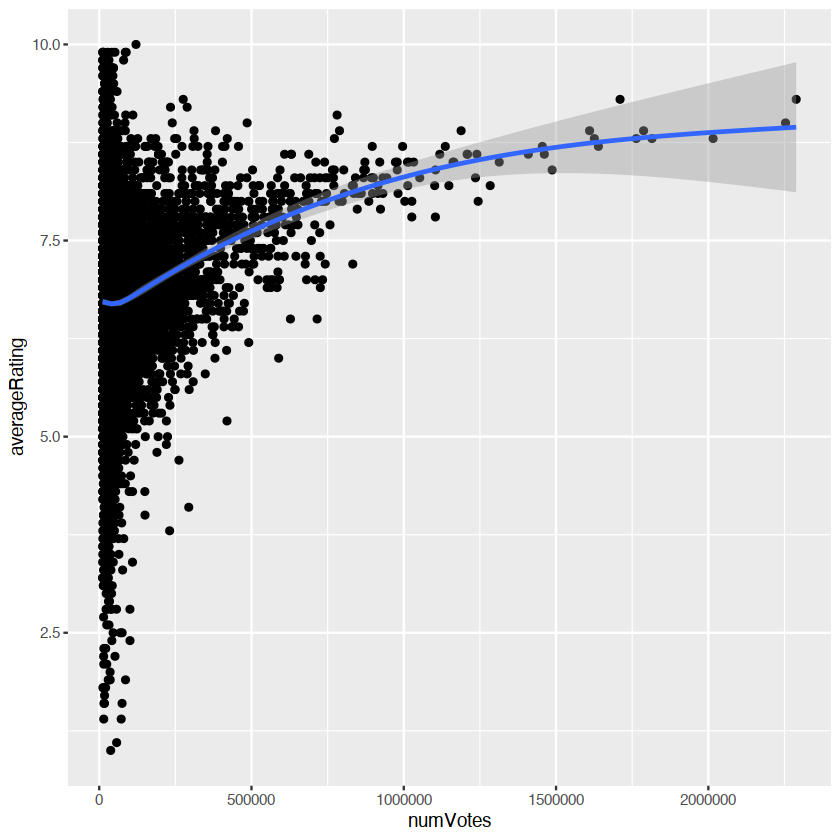

In [14]:
ggplot(imdb_titles, aes(x=numVotes, y=averageRating)) + 
    geom_point() + 
    geom_smooth()

### Part (c) (5 points)

Now our attention turns to TV series. Construct a dataset called containing only TV Series with a variable called "years_on_air" equal to the number of years that show was being actively shown on TV. Filter out series which are still running (i.e. that have a missing value in the year that they ended `endYear`).

You will be working with the variables `titleType`, `endYear`, `startYear`.  

Show a histogram of "runtime", setting the bin width equal to 1.

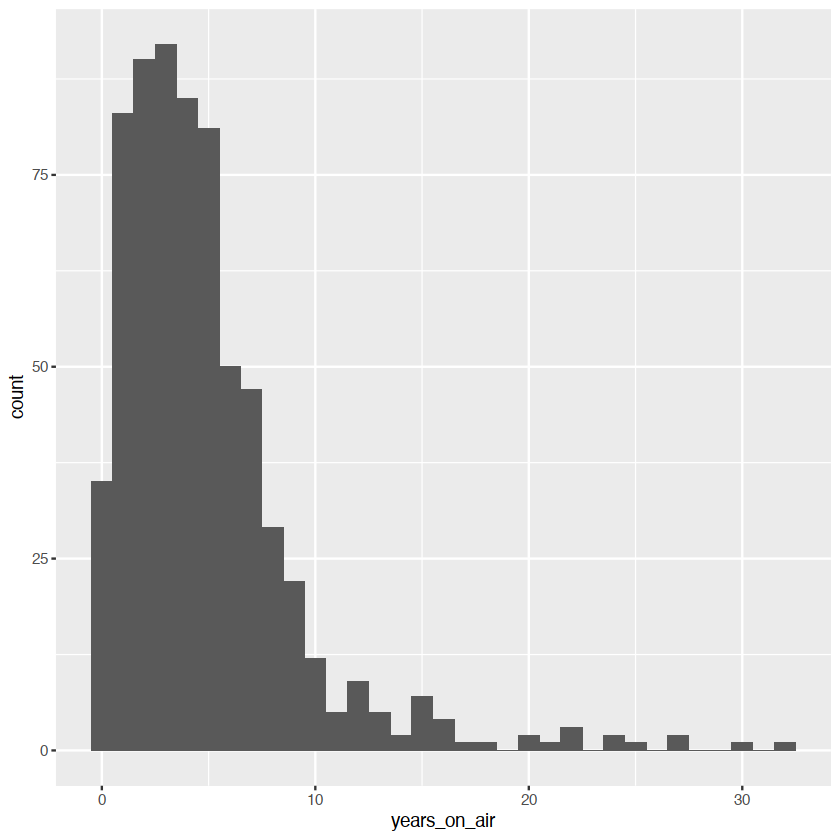

In [15]:
tv_series  <- filter(imdb_titles, titleType=="tvSeries", !is.na(endYear)) %>%
    mutate(years_on_air=endYear-startYear)


## Distribution of runs of TV shows
ggplot(tv_series) + geom_histogram(aes(x=years_on_air), binwidth = 1)

### Part (d) (3 points)

We want to know which genres do the best, but they are collected in the `genres` variable as one character vector. 
We want to explore the ratings of titles in three categories: Drama, Action, and Comedy.

Mutate ```imdb_titles``` so that it has three new columns, ```is_drama```, ```is_action```, and ```is_comedy``` which are TRUE when the movie is in the respective genre, and FALSE otherwise. 

Store the result in the variable ```topgenres``` and print the result. 

Hint: The ```stri_detect_fixed``` function from the ```stringi``` package will be useful here. For instance, to create the variable is_drama, you can use the following code.  

is_drama  = stri_detect_fixed(genres, "Drama").


In [16]:
library(stringi)
topgenres <- mutate(imdb_titles, 
                    is_drama  = stri_detect_fixed(genres, "Drama"),
                    is_action = stri_detect_fixed(genres, "Action"),
                    is_comedy = stri_detect_fixed(genres, "Comedy")) 
print(topgenres)

# A tibble: 8,007 x 11
   primaryTitle titleType startYear endYear runtimeMinutes genres averageRating
   <chr>        <chr>         <dbl>   <dbl>          <dbl> <chr>          <dbl>
 1 The Shawsha… movie          1994      NA            142 Drama            9.3
 2 The Dark Kn… movie          2008      NA            152 Actio…           9  
 3 Inception    movie          2010      NA            148 Actio…           8.8
 4 Fight Club   movie          1999      NA            139 Drama            8.8
 5 Pulp Fiction movie          1994      NA            154 Crime…           8.9
 6 Forrest Gump movie          1994      NA            142 Drama…           8.8
 7 Game of Thr… tvSeries       2011    2019             57 Actio…           9.3
 8 The Matrix   movie          1999      NA            136 Actio…           8.7
 9 The Lord of… movie          2001      NA            178 Actio…           8.8
10 The Lord of… movie          2003      NA            201 Actio…           8.9
# … with 7,997 mo

### Part (e) (5 points)
Using the ```topgenres``` dataset from part (d), make a plot of two histograms side-by-side: one with movies which are not comedies (```is_comedy==FALSE```), and one of movies which are comedies(```is_comedy==TRUE```). Adjust the fill to vary with ```is_comedy```. Use a bin width of 0.1. Adjust the scale so that it is easier to see the proportions of each group. (Hint: check out the ```scales``` argument to ```facet_wrap```).

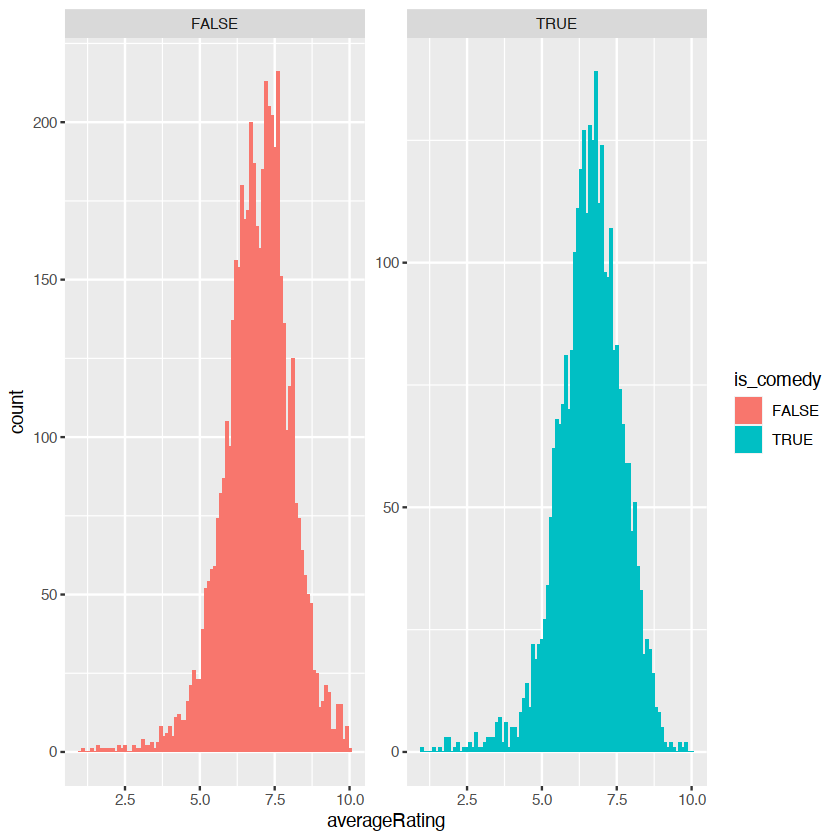

In [17]:
ggplot(topgenres) + 
    geom_histogram(aes(x=averageRating, fill=is_comedy), binwidth=.1) + 
    facet_wrap(~is_comedy, scales="free_y")

### Part (f) (challenge) (4 points)
The ```genres``` column comes as a list of multiple genres separated by columns. First, create a dataset with the ```genres``` column split into three different variables, ```genre1```, ```genre2```, and ```genre3```. Save this as ```tidygenres``` and print the result.

#### Hint:
Use ```tidyr::separate```.

Next, using the ```tidygenres``` dataset, we want to create a dataset that counts the number of times a genre appears (stored in the variable ```count```), and the average ```averageRating``` value of titles with that genre (stored in the variable ```averageRating```) for each ```titleType```-```genre``` pair. Note that titles can have multple genres. Sort by titleType in ascending order and by ```averageRating``` in descending order. Store this in ```genre_ratings``` and print the result.

#### Hint: 
-  Try to ```gather()``` the variables ```genre1```, ```genre2``` and ```genre3```. 
-  The ```genre_ratings``` dataset printed will look like this:

```
# A tibble: 63 x 4
   titleType genre       count averageRating
   <chr>     <chr>       <int>         <dbl>
 1 movie     Film-Noir       5          7.84
 2 movie     Documentary   138          7.49
 3 movie     News            3          7.47
 4 movie     History       228          7.20
 5 movie     Biography     477          7.19
 6 movie     War           125          7.15
 7 movie     Animation     324          6.92
 8 movie     Drama        3689          6.90
 9 movie     Western        38          6.86
10 movie     Musical        71          6.85
# … with 53 more rows
```

-  ```tail(genre_ratings)``` looks like this:
```
# A tibble: 6 x 4
  titleType genre      count averageRating
  <chr>     <chr>      <int>         <dbl>
1 tvSeries  Romance       73          7.49
2 tvSeries  Music         20          7.49
3 tvSeries  Horror        36          7.45
4 tvSeries  Family        58          7.32
5 tvSeries  Game-Show      8          7.14
6 tvSeries  Reality-TV    12          6.56
 ```

In [18]:
tidygenre <- imdb_titles %>%
    separate(genres, c("genre1", "genre2", "genre3"), sep=",")
print(tidygenre)

genre_ratings <- 
    gather(tidygenre, starts_with("genre"), key="genre_order", value="genre") %>%
    filter(!is.na(genre)) %>%
    group_by(titleType, genre) %>%
    summarize(count=n(), averageRating=mean(averageRating)) %>%
    arrange(titleType, desc(averageRating)) %>%
    ungroup()

print(genre_ratings)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 2667 rows [1, 4, 5, 6, 8, 11, 16, 20, 28, 30, 31, 34, 35, 42, 53, 56, 58, 63, 67, 71, ...].”


# A tibble: 8,007 x 10
   primaryTitle titleType startYear endYear runtimeMinutes genre1 genre2 genre3
   <chr>        <chr>         <dbl>   <dbl>          <dbl> <chr>  <chr>  <chr> 
 1 The Shawsha… movie          1994      NA            142 Drama  NA     NA    
 2 The Dark Kn… movie          2008      NA            152 Action Crime  Drama 
 3 Inception    movie          2010      NA            148 Action Adven… Sci-Fi
 4 Fight Club   movie          1999      NA            139 Drama  NA     NA    
 5 Pulp Fiction movie          1994      NA            154 Crime  Drama  NA    
 6 Forrest Gump movie          1994      NA            142 Drama  Roman… NA    
 7 Game of Thr… tvSeries       2011    2019             57 Action Adven… Drama 
 8 The Matrix   movie          1999      NA            136 Action Sci-Fi NA    
 9 The Lord of… movie          2001      NA            178 Action Adven… Drama 
10 The Lord of… movie          2003      NA            201 Action Adven… Drama 
# … with 7,997 mo

`summarise()` regrouping output by 'titleType' (override with `.groups` argument)



# A tibble: 63 x 4
   titleType genre       count averageRating
   <chr>     <chr>       <int>         <dbl>
 1 movie     Film-Noir       5          7.84
 2 movie     Documentary   138          7.49
 3 movie     News            3          7.47
 4 movie     History       228          7.20
 5 movie     Biography     477          7.19
 6 movie     War           125          7.15
 7 movie     Animation     324          6.92
 8 movie     Drama        3689          6.90
 9 movie     Western        38          6.86
10 movie     Musical        71          6.85
# … with 53 more rows


## Part 2: Review left_join() and relational data

### Duplicate keys:
1. One table has duplicate keys. This is useful when you want to add in additional information as there is typically a one-to-many relationship. ![duplicate keys](http://r4ds.had.co.nz/diagrams/join-one-to-many.png)

In [20]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     1, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2"
)

In [21]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x3,y2
1,x4,y1


2. Both tables have duplicate keys
This represents a many-to-many join and is usually an error since they key does not uniquely identify observations in either table. Joining duplicated keys results in the Cartesian product of all the possible matches:
![cartesian](http://r4ds.had.co.nz/diagrams/join-many-to-many.png)

In [22]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     3, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     2, "y3",
     3, "y4"
)


In [23]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x2,y3
2,x3,y2
2,x3,y3
3,x4,y4


### Defining the key columns
When we do a join using `left_join()`, R take as the key whatever column names the two tables have in common:

In [26]:
flights2 <- flights %>% 
  select(year:day, hour, origin, dest, tailnum, carrier)

1. The default, by = NULL, uses all variables that appear in both tables, the so called natural join. For example, the flights and weather tables match on their common variables: year, month, day, hour and origin.

In [27]:
flights2 %>% 
  left_join(weather)

Joining, by = c("year", "month", "day", "hour", "origin")



year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,6,EWR,FLL,N516JB,B6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00
2013,1,1,6,LGA,IAD,N829AS,EV,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,6,JFK,MCO,N593JB,B6,37.94,26.96,64.29,260,13.80936,NA,0,1012.6,10,2013-01-01 06:00:00


2. A character vector, by = "x". This is like a natural join, but uses only some of the common variables. For example, flights and planes have year variables, but they mean different things so we only want to join by tailnum.

In [28]:
flights2 %>% 
  left_join(planes, by = "tailnum")

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan
2013,1,1,6,EWR,FLL,N516JB,B6,2000,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,IAD,N829AS,EV,1998,Fixed wing multi engine,CANADAIR,CL-600-2B19,2,55,NA,Turbo-fan
2013,1,1,6,JFK,MCO,N593JB,B6,2004,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan


Note that the year variables (which appear in both input data frames, but are not constrained to be equal) are disambiguated in the output with a suffix.

3. A named character vector: by = c("a" = "b"). This will match variable a in table x to variable b in table y. The variables from x will be used in the output. For example, if we want to draw a map we need to combine the flights data with the airports data which contains the location (lat and lon) of each airport. Each flight has an origin and destination airport, so we need to specify which one we want to join to:

In [29]:
flights2 %>% 
  left_join(airports, c("dest" = "faa"))

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,LGA,IAH,N24211,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,JFK,MIA,N619AA,AA,Miami Intl,25.79325,-80.29056,8,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,NA,NA,NA,NA,NA,NA,NA
2013,1,1,6,LGA,ATL,N668DN,DL,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago
2013,1,1,6,EWR,FLL,N516JB,B6,Fort Lauderdale Hollywood Intl,26.07258,-80.15275,9,-5,A,America/New_York
2013,1,1,6,LGA,IAD,N829AS,EV,Washington Dulles Intl,38.94453,-77.45581,313,-5,A,America/New_York
2013,1,1,6,JFK,MCO,N593JB,B6,Orlando Intl,28.42939,-81.30899,96,-5,A,America/New_York


In [30]:
flights2 %>% 
  left_join(airports, c("origin" = "faa"))

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,6,EWR,FLL,N516JB,B6,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,6,LGA,IAD,N829AS,EV,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,6,JFK,MCO,N593JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
